In [25]:
%matplotlib inline
from pymatgen.io.vasp import Vasprun, BSVasprun
from pymatgen.electronic_structure.plotter import DosPlotter, BSPlotter, BSDOSPlotter
import matplotlib.pyplot as plt
import numpy as np
from pymatgen import Spin
from pymatgen.io.vasp.inputs import Kpoints

In [214]:
plt.rc('figure', figsize=(10,8))
plt.style.use('seaborn')

In [202]:
# build parametric positions:
def get_ls(kpointlist, vertexs):
    ls = []
    for k, kp in enumerate(kpointlist):
        if k == 0:
            ls.append(0)
        else:
            dl = np.linalg.norm(np.array(kp) - np.array(b.actual_kpoints[k-1]))
            ls.append(ls[-1]+dl)
    return ls

In [3]:
plt.rc('font',size=14)

In [4]:
constante = 7.6202713   # hbar^2 / me

In [8]:
!cd ZrO2-new-05/TOTEN_5dir/ && 7za x vasprun.7z


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=es_AR.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Core(TM) i5-5200U CPU @ 2.20GHz (306D4),ASM,AES-NI)

Scanning the drive for archives:
  0M Sca        1 file, 3468338 bytes (3388 KiB)

Extracting archive: vasprun.7z
--
Path = vasprun.7z
Type = 7z
Physical Size = 3468338
Headers Size = 130
Method = LZMA2:24
Solid = -
Blocks = 1

     43% - vasprun.x                 94% - vasprun.x                Everything is Ok

Size:       57433458
Compressed: 3468338


In [10]:
v = Vasprun('ZrO2-new-05/TOTEN_5dir/vasprun.xml')
cdos = v.complete_dos
element_dos = cdos.get_element_dos()
plotter = DosPlotter(zero_at_efermi=True)
plotter.add_dos_dict(element_dos)
#plotter.show(xlim=[-5, 5], ylim=[0, 1])

/usr/lib64/python3.6/site-packages/pymatgen/io/vasp/inputs.py:1859: BadPotcarWarning: POTCAR with symbol O has metadata that does not match                          any VASP POTCAR known to pymatgen. The data in this                          POTCAR is known to match the following functionals:                          ['PBE']
  BadPotcarWarning)
/usr/lib64/python3.6/site-packages/pymatgen/io/vasp/inputs.py:1859: BadPotcarWarning: POTCAR with symbol Zr_sv has metadata that does not match                          any VASP POTCAR known to pymatgen. The data in this                          POTCAR is known to match the following functionals:                          ['PBE']
  BadPotcarWarning)


In [11]:
efermi = cdos.efermi
print(efermi)

2.9375


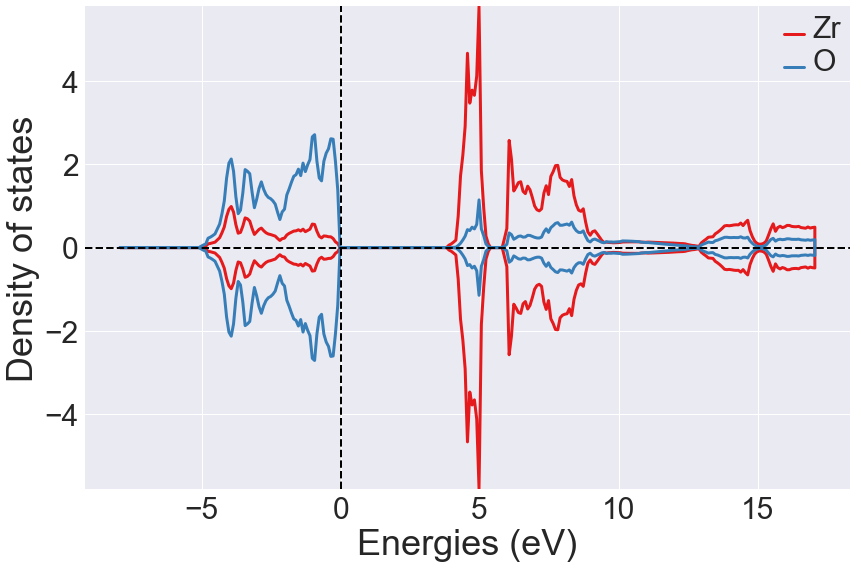

In [215]:

plotter.show()

In [126]:
b = BSVasprun('ZrO2-new-05/BANDSdir/vasprun.xml.gz',parse_projected_eigen=True)

In [127]:
bs = b.get_band_structure("ZrO2-new-05/BANDSdir/KPOINTS",efermi=cdos.efermi)

In [164]:
kpointvertex = Kpoints.from_file("ZrO2-new-05/BANDSdir/KPOINTS")

In [203]:
ls = get_ls(b.actual_kpoints)
vls = get_ls(kpointvertex.kpts)

In [220]:
for k, ks in enumerate(vls):
    print(kpointvertex.kpts[k], ks)

[0.0, 0.5, 0.0] 0
[0.5, 0.0, 0.0] 0.7071067811865476
[0.0, 0.0, 0.0] 1.1867261357561665
[0.5, 0.0, 0.0] 1.8349073471297899
[0.5, 0.0, 0.0] 2.453625780668019
[0.5, 0.5, 0.0] 2.8785440760822993
[0.5, 0.5, 0.0] 3.287854130048456
[0.0, 0.0, 0.0] 3.683138837569503
[0.0, 0.0, 0.0] 4.066155012525311
[0.0, 0.0, 0.5] 4.6897645760967634
[0.0, 0.0, 0.5] 5.308483009634992
[0.5, 0.5, 0.5] 5.9236839709295745
[0.5, 0.5, 0.5] 6.536764761101455
[0.5, 0.5, 0.0] 6.890318151694729
[0.0, 0.0, 0.5] 7.50339894186661
[0.5, 0.0, 0.5] 8.083748451022755


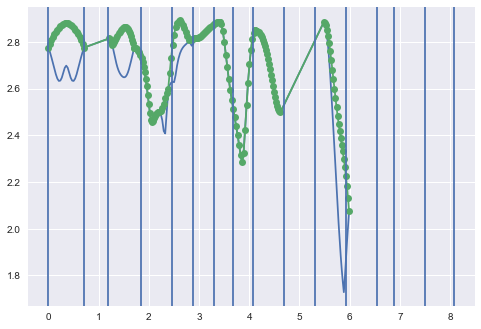

In [222]:
plt.plot(ls,bs.bands[Spin.up][22])
plt.plot(ls,bs.bands[Spin.up][23],'-o')
for v in vls:
    plt.axvline(x=v)



In [177]:
ktest = bs.kpoints

In [130]:
!cat ZrO2-new-05/BANDSdir/KPOINTS

k-point along high symmetry lines
25
Line-mode
rec
0 0.5 0    !  X'
0.5 0 0    !  X

0  0  0    ! \gamma
0.5 0 0    !  X

0.5 0 0    !  X
0.5 0.5 0.0 ! M

0.5 0.5 0.0 ! M
0  0  0    ! \gamma

0  0  0    ! \gamma
0  0  0.5  ! Z

0  0  0.5  ! Z
0.5 0.5 0.5 ! A

0.5 0.5 0.5 ! A
0.5 0.5 0. ! M

0  0  0.5  ! Z
0.5 0 0.5 ! R


In [134]:
from mpl_toolkits.mplot3d import Axes3D

In [150]:
kx = np.array(b.actual_kpoints)

In [155]:
Axes3D.scatter (kx[:,0], kx[:,1], kx[:,2])

AttributeError: 'numpy.ndarray' object has no attribute 'has_data'

In [159]:
kx[:,2]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
ktest[0].as_dict

In [60]:
np.norm(ktest[0].cart_coords)

AttributeError: module 'numpy' has no attribute 'norm'

In [48]:
ls = []
for i, kp in enumerate(bs.kpoints):
    ls.app

0.0 0.5 0.0
0.02083333 0.47916667 0.0
0.04166667 0.45833333 0.0
0.0625 0.4375 0.0
0.08333333 0.41666667 0.0
0.10416667 0.39583333 0.0
0.125 0.375 0.0
0.14583333 0.35416667 0.0
0.16666667 0.33333333 0.0
0.1875 0.3125 0.0
0.20833333 0.29166667 0.0
0.22916667 0.27083333 0.0
0.25 0.25 0.0
0.27083333 0.22916667 0.0
0.29166667 0.20833333 0.0
0.3125 0.1875 0.0
0.33333333 0.16666667 0.0
0.35416667 0.14583333 0.0
0.375 0.125 0.0
0.39583333 0.10416667 0.0
0.41666667 0.08333333 0.0
0.4375 0.0625 0.0
0.45833333 0.04166667 0.0
0.47916667 0.02083333 0.0
0.5 0.0 0.0
0.0 0.0 0.0
0.02083333 0.0 0.0
0.04166667 0.0 0.0
0.0625 0.0 0.0
0.08333333 0.0 0.0
0.10416667 0.0 0.0
0.125 0.0 0.0
0.14583333 0.0 0.0
0.16666667 0.0 0.0
0.1875 0.0 0.0
0.20833333 0.0 0.0
0.22916667 0.0 0.0
0.25 0.0 0.0
0.27083333 0.0 0.0
0.29166667 0.0 0.0
0.3125 0.0 0.0
0.33333333 0.0 0.0
0.35416667 0.0 0.0
0.375 0.0 0.0
0.39583333 0.0 0.0
0.41666667 0.0 0.0
0.4375 0.0 0.0
0.45833333 0.0 0.0
0.47916667 0.0 0.0
0.5 0.0 0.0
0.5 0.0 0.0
0

In [15]:
bsplot=BSPlotter(bs)

ValueError: BSPlotter only works with BandStructureSymmLine objects. A BandStructure object (on a uniform grid for instance and not along symmetry lines won't work)

In [16]:
bsplot.get_plot(zero_to_efermi=True)

NameError: name 'bsplot' is not defined

In [17]:
bsdata = bsplot.bs_plot_data()

NameError: name 'bsplot' is not defined

In [13]:
gamma_z_distances=bsdata['distances'][1]
gamma_z_energies_e=bsdata['energy'][1]['1'][24]
gamma_z_energies_h=bsdata['energy'][1]['1'][22]

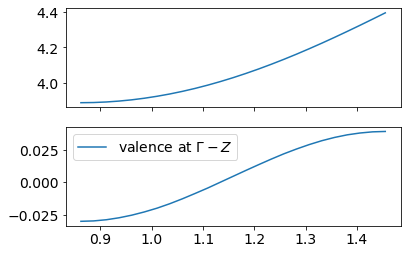

In [14]:
fig,ax = plt.subplots(2,1, sharex=True)
ax[0].plot(gamma_z_distances, gamma_z_energies_e,label=r'conduction at $\Gamma - Z$')
ax[1].plot(gamma_z_distances, gamma_z_energies_h,label=r'valence at $\Gamma - Z$')
plt.legend()

A estas banditas habría que derivarlas dos veces !

In [15]:
bsdosplot = BSDOSPlotter(
    bs_projection="elements", 
    dos_projection="elements",
    vb_energy_range=1,
    cb_energy_range=6
)

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


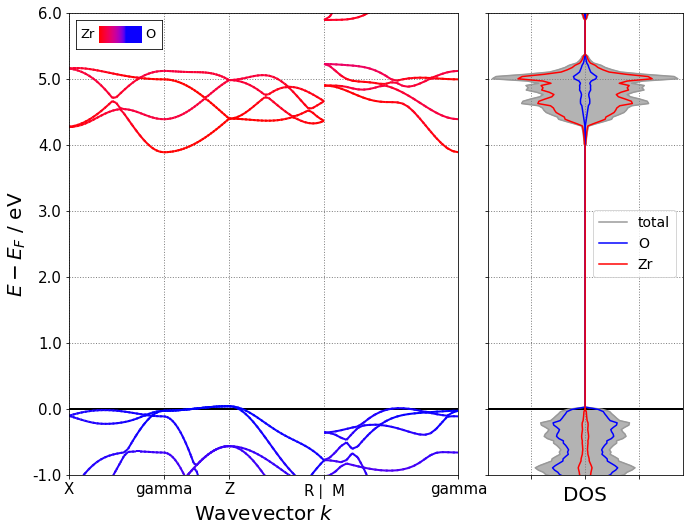

In [16]:
plot = bsdosplot.get_plot(bs, dos=cdos)

# Caminos $Z'-\Gamma-Z$, $X'-\Gamma-X$

In [12]:
gama_center_run = BSVasprun('Z-Gamma-Zdir/vasprun.xml', parse_projected_eigen=True)
bs_gama_center_run = gama_center_run.get_band_structure('Z-Gamma-Zdir/KPOINTS',efermi=cdos.efermi)

In [13]:
gama_center_plot_object = BSPlotter(bs_gama_center_run)


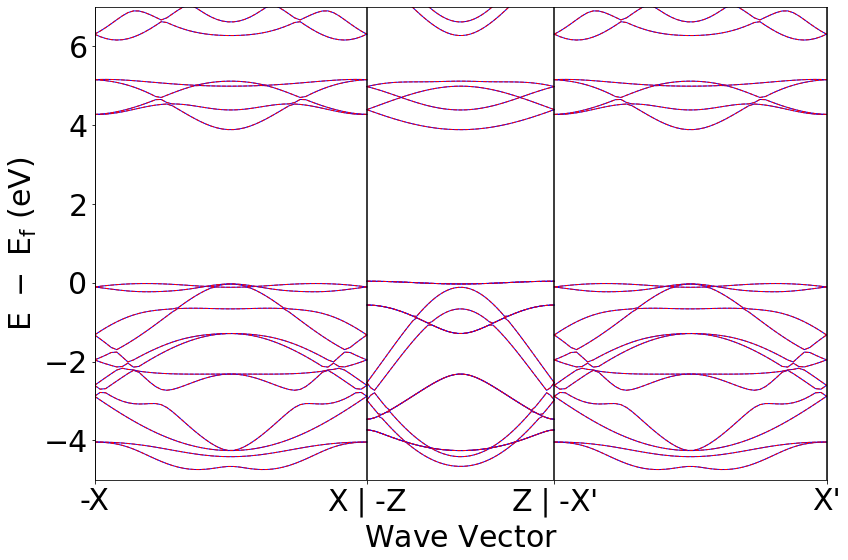

In [14]:
gama_center_plot=gama_center_plot_object.get_plot(zero_to_efermi=True,ylim=[-5,7])

Ahora quiero separar los distintos segmentos y quedarme solo con las bandas que voy a fitear

In [15]:
gama_center_data = gama_center_plot_object.bs_plot_data()

me fijo el path $Z-\Gamma-Z$

In [70]:
zzpath  = gama_center_data['distances'][1]
zzener0 = gama_center_data['energy'][1]['1'][23]
zzener1 = gama_center_data['energy'][1]['1'][24]

TypeError: unsupported operand type(s) for -: 'list' and 'float'

In [18]:
zzgama = np.mean(zzpath)

## ¿Como se ven la primera banda de conduccion y la ultima de valencia ?

[]

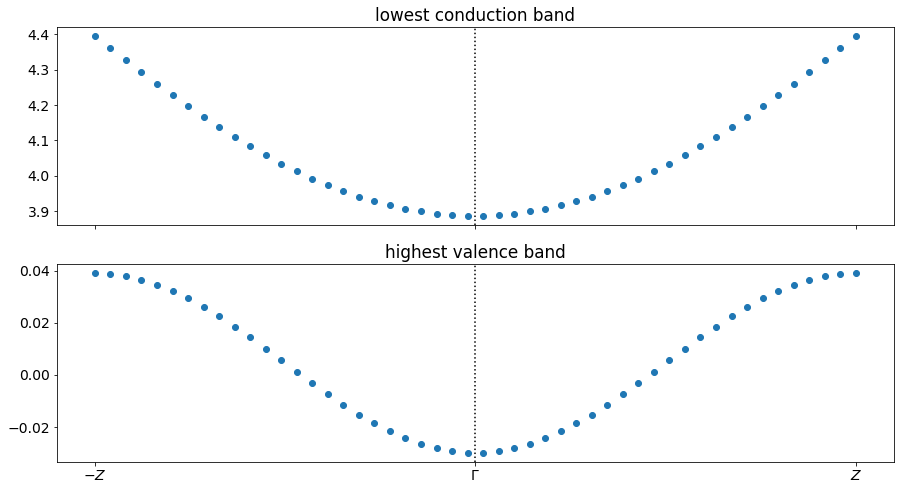

In [69]:
fig, ax = plt.subplots(2,1, figsize=(15,8), sharex=True)
ax[1].plot(zzpath-zzgama,zzener0,'o')
ax[1].set_title ('highest valence band')
ax[0].plot(zzpath-zzgama,zzener1,'o')
ax[0].set_title('lowest conduction band')
special_points_xx = [zzpath[0]-zzgama, 0, zzpath[-1]-zzgama]
special_labels_xx = [r'$-Z$', r'$\Gamma$',r'$Z$']
ax[0].axvline(c='k',ls=':')
ax[1].axvline(c='k',ls=':')
ax[0].set_xticks(special_points_xx)
ax[0].set_xticklabels(special_labels_xx)

estan bien las distancias ?

In [35]:
D_Z_Z=zzpath[-1] - zzpath[0]
D_X_X=xxpath[-1] - xxpath[0]
D_X_P=xppath[-1] - xppath[0]
print('distancia z-Gamma-z :{}'.format(D_Z_Z))
print('distancia X-Gamma-X :{}'.format(D_X_X))
print('distancia X\'-Gamma-X\' :{}'.format(D_X_P))


distancia z-Gamma-z :1.1865413100830904
distancia X-Gamma-X :1.723748930481296
distancia X'-Gamma-X' :1.7237489304812939


In [63]:
print (zzgama)

2.3170195855228415


que estan mal, porque son:
```
reciprocal lattice vectors

0.274343163  0.000000002  0.000000001
0.000000002  0.274343163  0.000000001
0.000000000  0.000000001  0.188843915
```


In [21]:
# vectores de la red reciproca
b1 = 0.274343163
b2 = 0.274343163
b3 = 0.188843915

Para pasar el segmente Z-G-Z a dimensiones de red reciproca:
$(k - k_o)_{\Gamma - Z}$ es:

In [26]:
kko_gz=(b3/2)*(zzpath-zzgama)/(zzpath[-1]-zzgama)

In [27]:
kko_gz

array([-0.09442196, -0.090568  , -0.08671404, -0.08286009, -0.07900613,
       -0.07515217, -0.07129821, -0.06744426, -0.0635903 , -0.05973634,
       -0.05588238, -0.05202842, -0.04817447, -0.04432051, -0.04046655,
       -0.0366126 , -0.03275864, -0.02890468, -0.02505072, -0.02119677,
       -0.01734281, -0.01348885, -0.00963489, -0.00578094, -0.00192698,
        0.00192698,  0.00578094,  0.00963489,  0.01348885,  0.01734281,
        0.02119677,  0.02505072,  0.02890468,  0.03275864,  0.0366126 ,
        0.04046655,  0.04432051,  0.04817447,  0.05202842,  0.05588238,
        0.05973634,  0.0635903 ,  0.06744426,  0.07129821,  0.07515217,
        0.07900613,  0.08286009,  0.08671404,  0.090568  ,  0.09442196])

en $\Gamma$ tengo que ver la masa efectiva del electrón, la del hueco la tengo que ver en $Z$

In [33]:
DEEo_gz = zzener1-min(zzener1)

Text(0, 0.5, '$E-E_o$')

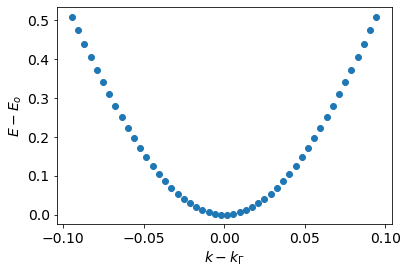

In [35]:
plt.plot(kko_gz, DEEo_gz,'o')
plt.xlabel(r'$k-k_{\Gamma}$')
plt.ylabel(r'$E-E_o$')

como dije antes, para la banda de valencia tengo que tomar el valor en Z y no en gamma

In [46]:
kko_zeta = (b3/2)*(1-abs(zzpath-zzgama)/(zzpath[-1]-zzgama))
DEEo_zeta = zzener0-max(zzener0)

Text(0, 0.5, '$E-E_o$')

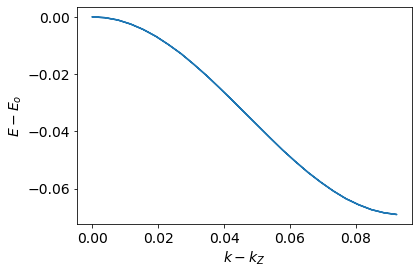

In [65]:
plt.plot(kko_zeta, DEEo_zeta)
plt.xlabel(r'$k-k_{Z}$')
plt.ylabel(r'$E-E_o$')

Ahora, tengo que obterner las masas derivando estas curvas como voy a explicar mas abajo.

# Cómo sacar la masa efectiva

luego:
$$ E = E_0 + \frac{ \hbar^2 }{ 2m } (k-k_o)^2 $$

$$ \frac{ \partial E  }{\partial k } = \frac{ \hbar^2 }{ 2m } 2(k-k_o) $$

$$ \frac{ \partial^2 E  }{\partial k^2} = \frac{ \hbar^2 }{ m } $$


$$ m = \frac{ \hbar ^2 }  { \frac{ \partial ^2 E }{\partial k^2} } $$

$$ (k-k_o)^2 = \frac{m}{m_e} 2 \frac{ m_e}{\hbar^2} (E-E_o) =  \frac{m}{m_e} \frac{ 2 }{cte} (E-E_o)$$

o bien:
$$ \frac{m}{m_e} = \frac{cte}{2} \frac{(k-k_o)^2}{E-E_o} $$

In [62]:
ksq_zgz = kko_gz**2


In [68]:
constante

7.6202713

In [66]:
m_zgz, b = np.polyfit((2/constante)*DEEo_gz,ksq_zgz,1)

Text(0.5, 1.0, 'conduction band: $m_{ZGZ}$ =0.0655')

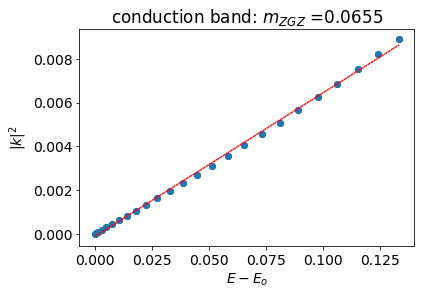

In [67]:
plt.plot((2/constante)*DEEo_gz, ksq_zgz,'o')
plt.plot((2/constante)*DEEo_gz, m_zgz*(2/constante)*DEEo_gz+b,':r')
plt.xlabel('$E-E_o$')
plt.ylabel(r'$|k|^2$')
plt.title(r'conduction band: $m_{ZGZ}$ ='+'{:.4f}'.format(m_zgz))

In [80]:
# la masa Z-G-Z de conduccion:
inv_m_zgz_c = (2/constante)*np.gradient(DE_zgz, ksq_zgz)
#plt.xtics([np.min()])

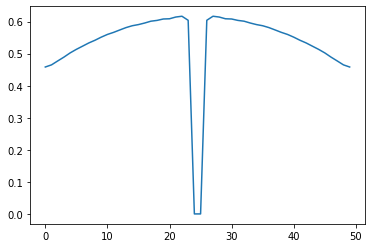

In [83]:
plt.plot(inv_m_zgz_c)

In [75]:
dDE_ksq = 2*np.gradient(y,ksq)/constante

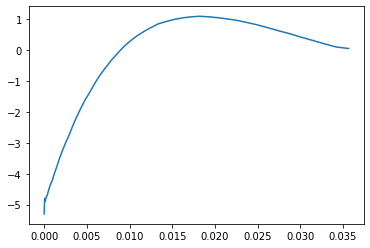

In [76]:
plt.plot(ksq,dDE_ksq)

In [ ]:
dDE_ksq

In [48]:
delta_zzener0 = np.gradient(zzener0,zzpath)
delta_zzener0_2 = np.gradient(delta_zzener0,zzpath) # /zzpath
mzzh = constante/delta_2_zzener1 

NameError: name 'delta_2_zzener1' is not defined

(2.1170195855228413, 2.5170195855228417)

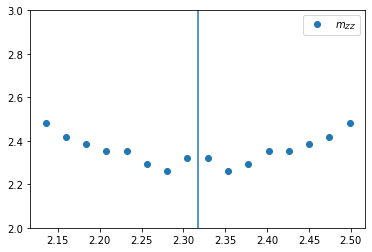

In [189]:
plt.plot(zzpath, mzzh,'o', label=r'$m_{ZZ}$')
#r'$\frac{\partial^2 E(k)}{\partial{k}^2}$'
plt.axvline(zzgama)
plt.legend()
plt.ylim([2,3])
plt.xlim([zzgama-0.2,zzgama+0.2])

In [172]:
delta_zzener1 = np.gradient(zzener1,zzpath)
delta_2_zzener1 = np.gradient(delta_zzener1,zzpath)
# E = hbar2/2 m k^2
mzzh = constante/delta_2_zzener1

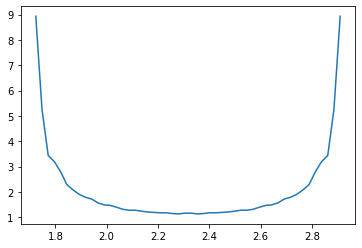

In [173]:
plt.plot(zzpath,mzz)

In [190]:
x = np.linspace(0,1,10)

In [191]:
y = x**2

In [192]:
dy = np.gradient(y,x)

In [193]:
ddy = np.gradient(dy,x)

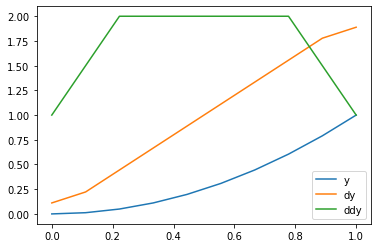

In [196]:
plt.plot(x,y,label='y')
plt.plot(x,dy,label='dy')
plt.plot(x,ddy,label='ddy')
plt.legend()